In [34]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input, GlobalAveragePooling2D
from keras.models import Model, Sequential
from keras.optimizers import legacy
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import importlib
import random
import shutil
import cv2
import os

In [35]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [40]:
dataset_path = "../koppaka_saivasishta/data/train"

In [41]:
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

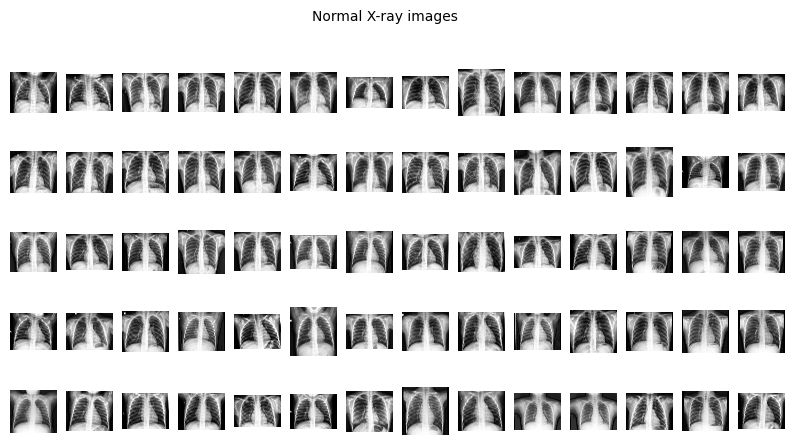

In [42]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

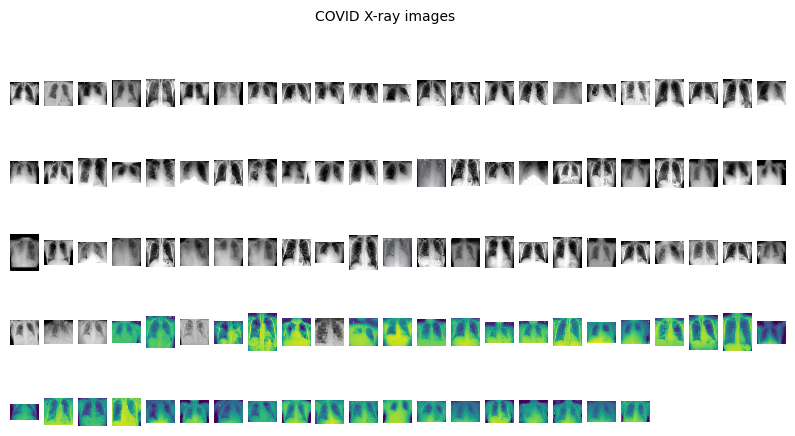

In [43]:
plots_from_files(covid_images, rows=5, maintitle="COVID X-ray images")

In [44]:
INIT_LR = 1e-3
EPOCHS = 100
BS = 8

In [45]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))
print(imagePaths)
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)
# Normalize with Image Net Mean
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])
data = (data - imagenet_mean) / imagenet_std

[INFO] loading images...
['../koppaka_saivasishta/data/train\\Covid\\01.jpeg', '../koppaka_saivasishta/data/train\\Covid\\010.png', '../koppaka_saivasishta/data/train\\Covid\\012.jpeg', '../koppaka_saivasishta/data/train\\Covid\\015.jpg', '../koppaka_saivasishta/data/train\\Covid\\019.png', '../koppaka_saivasishta/data/train\\Covid\\02.jpeg', '../koppaka_saivasishta/data/train\\Covid\\020.jpg', '../koppaka_saivasishta/data/train\\Covid\\021.jpeg', '../koppaka_saivasishta/data/train\\Covid\\022.jpeg', '../koppaka_saivasishta/data/train\\Covid\\024.jpeg', '../koppaka_saivasishta/data/train\\Covid\\025.jpeg', '../koppaka_saivasishta/data/train\\Covid\\026.jpeg', '../koppaka_saivasishta/data/train\\Covid\\027.jpeg', '../koppaka_saivasishta/data/train\\Covid\\03.jpeg', '../koppaka_saivasishta/data/train\\Covid\\031.jpeg', '../koppaka_saivasishta/data/train\\Covid\\032.jpeg', '../koppaka_saivasishta/data/train\\Covid\\033.png', '../koppaka_saivasishta/data/train\\Covid\\039.jpeg', '../koppak

In [46]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.15, stratify=labels, random_state=15)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(fill_mode="nearest",
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,shear_range=0.2, zoom_range=0.2
  )

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

In [48]:
class ModelFactory:
    """
    Model facotry for Keras default models
    """

    def __init__(self):
        self.models_ = dict(
            VGG16=dict(
                input_shape=(224, 224, 3),
                module_name="vgg16",
                last_conv_layer="block5_conv3",
            ),
            VGG19=dict(
                input_shape=(224, 224, 3),
                module_name="vgg19",
                last_conv_layer="block5_conv4",
            ),
            DenseNet121=dict(
                input_shape=(224, 224, 3),
                module_name="densenet",
                last_conv_layer="bn",
            ),
            ResNet50=dict(
                input_shape=(224, 224, 3),
                module_name="resnet50",
                last_conv_layer="activation_49",
            ),
            InceptionV3=dict(
                input_shape=(299, 299, 3),
                module_name="inception_v3",
                last_conv_layer="mixed10",
            ),
            InceptionResNetV2=dict(
                input_shape=(299, 299, 3),
                module_name="inception_resnet_v2",
                last_conv_layer="conv_7b_ac",
            ),
            NASNetMobile=dict(
                input_shape=(224, 224, 3),
                module_name="nasnet",
                last_conv_layer="activation_188",
            ),
            NASNetLarge=dict(
                input_shape=(331, 331, 3),
                module_name="nasnet",
                last_conv_layer="activation_260",
            ),
        )

    def get_last_conv_layer(self, model_name):
        return self.models_[model_name]["last_conv_layer"]

    def get_input_size(self, model_name):
        return self.models_[model_name]["input_shape"][:2]

    def get_model(self, class_names, model_name="DenseNet121", use_base_weights=True,
                  weights_path=None, input_shape=None):

        if use_base_weights is True:
            base_weights = "imagenet"
        else:
            base_weights = None

        base_model_class = getattr(
            importlib.import_module(
                f"keras.applications.{self.models_[model_name]['module_name']}"
            ),
            model_name)

        if input_shape is None:
            input_shape = self.models_[model_name]["input_shape"]

        img_input = Input(shape=input_shape)

        base_model = base_model_class(
            include_top=False,
            input_tensor=img_input,
            input_shape=input_shape,
            weights=base_weights,
            pooling="avg")
        x = base_model.output
        predictions = Dense(len(class_names), activation="sigmoid", name="predictions")(x)
        model = Model(inputs=img_input, outputs=predictions)

        if weights_path == "":
            weights_path = None

        if weights_path is not None:
            print(f"load model weights_path: {weights_path}")
            model.load_weights(weights_path)
        return model

In [49]:
ChexNetClassesName = ['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Pneumothorax','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia']
model_factory = ModelFactory()

baseModel = model_factory.get_model(
        ChexNetClassesName,
        model_name="DenseNet121",
        use_base_weights=False,
        weights_path="ChexNet.h5",
        # weights_path="covid_model_v4.h5",
        input_shape=(224, 224, 3))


load model weights_path: ChexNet.h5


In [50]:
model = Sequential([Model(baseModel.inputs, baseModel.layers[-2].output)])

# for layer in model.layers:
#   layer.trainable = False

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 1024)              7037504   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)              

In [51]:
# compile our model
print("[INFO] compiling model...")
opt = legacy.Adam(learning_rate=INIT_LR, decay=1e-9)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/100


C:\Users\vasis\AppData\Local\Temp\ipykernel_17504\3424231430.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(


19/19 [==============================] - 66s 3s/step - loss: 0.8140 - accuracy: 0.5517 - val_loss: 0.6940 - val_accuracy: 0.3929
Epoch 2/100
19/19 [==============================] - 54s 3s/step - loss: 0.7168 - accuracy: 0.6276 - val_loss: 0.6776 - val_accuracy: 0.6071
Epoch 3/100
19/19 [==============================] - 53s 3s/step - loss: 0.7151 - accuracy: 0.5931 - val_loss: 0.6511 - val_accuracy: 0.6071
Epoch 4/100
19/19 [==============================] - 58s 3s/step - loss: 0.6955 - accuracy: 0.5517 - val_loss: 0.5862 - val_accuracy: 0.6071
Epoch 5/100
19/19 [==============================] - 59s 3s/step - loss: 0.5922 - accuracy: 0.5987 - val_loss: 0.6049 - val_accuracy: 0.6071
Epoch 6/100
19/19 [==============================] - 58s 3s/step - loss: 0.5619 - accuracy: 0.6414 - val_loss: 0.5322 - val_accuracy: 0.6071
Epoch 7/100
19/19 [==============================] - 58s 3s/step - loss: 0.4372 - accuracy: 0.6513 - val_loss: 0.3527 - val_accuracy: 0.7500
Epoch 8/100
19/19 [======

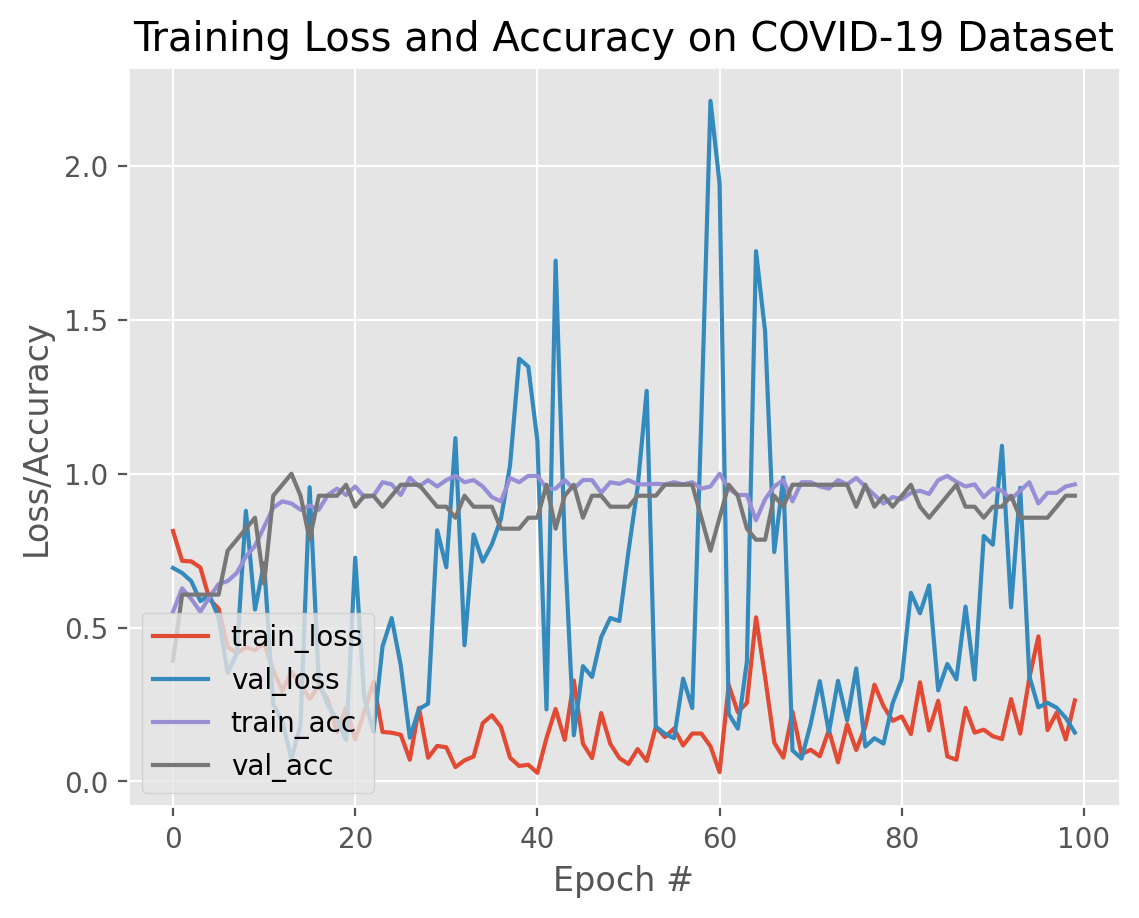

In [54]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure(dpi=200)
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [56]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
4/4 [==============================] - 3s 338ms/step
              precision    recall  f1-score   support

       Covid       1.00      0.88      0.94        17
      Normal       0.85      1.00      0.92        11

    accuracy                           0.93        28
   macro avg       0.92      0.94      0.93        28
weighted avg       0.94      0.93      0.93        28



In [57]:
model.save('covid_model_v6.h5')

c:\Users\vasis\Downloads\capstone\myenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
model.summary()
new_model = model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 1024)              7037504   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)              

1/1 [==============================] - 0s 132ms/step
[[1.0000000e+00 1.0600518e-25]]
[0]


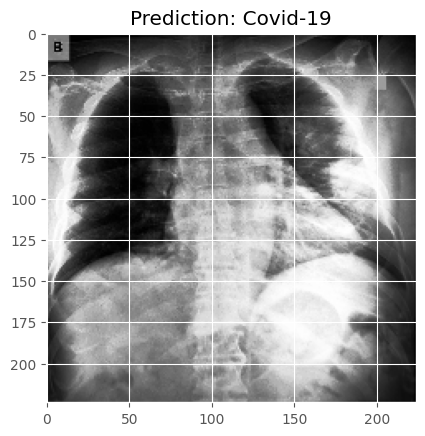

In [62]:
import numpy as np
from tensorflow.keras.preprocessing import image


img_width, img_height = 224, 224
img = image.load_img('../koppaka_saivasishta/data/test/Covid/0108.jpeg', target_size = (img_width, img_height))
x = image.img_to_array(img)
img = np.expand_dims(x, axis = 0) / 255.0

pred = new_model.predict(img)
print(pred)

print(np.argmax(pred, axis=1))
if np.argmax(pred, axis=1)[0] == 1:
    plt.title('Prediction: Non_Covid-19')
else:
    plt.title('Prediction: Covid-19')
plt.imshow(x/255.)
plt.savefig('plot_out.png')